
<h1><center>Concrete Compressive Strength Prediction using Linear Regression
.</center></h1>


<h3>Course Name:</h3>

<a href='https://coursesnew.iitm.ac.in/course/view.php?id=1509/' style="text-decoration: none">ID5030:Machine Learning for Engineering and Science Applications</a>
    
<h3>Course Faculity:</h3>
<a href='https://sites.google.com/site/balajisrinivasan/' style="text-decoration: none">Prof. Balaji Srinivasan</a>



<h3>Student Name:</h3>
<a href='https://www.linkedin.com/in/ahmecse/' style="text-decoration: none">AHMED SHMELS MUHE | GE22M009</a>
    
    
    
    

# Concrete-compressive-strength


Concrete is one of the most important materials in Civil Engineering. Knowing the compressive strength of concrete is very important when constructing a building or a bridge. 

The Compressive Strength of Concrete is a highly nonlinear function of ingredients used in making it and their characteristics. Thus, using Machine Learning to predict the Strength could be useful in generating a combination of ingredients which result in high Strength.

## 1. Problem Statement
Predicting Compressive Strength of Concrete given its age and quantitative measurements of ingredients.

##2. Approach:
1. Loading the dataset using Pandas and performed basic checks like the data type of each column and having any missing values.
2. Performed Exploratory data analysis:
    - First viewed the distribution of the target feature, "Concrete compressive strength", which was in Normal distribution with a very little right skewness.
    - Visualized each predictor or independent feature with the target feature and found that there's a direct proportionality between cement and the target feature while there's an inverse proportionality between water and the target feature.
    - To get even more better insights, plotted both Pearson and Spearman correlations, which showed the same results as above.
    - Checked for the presence of outliers in all the columns and found that the column 'age' is having more no. of outliers. Removed outliers using IQR technique, in which I considered both including and excluding the lower and upper limits into two separate dataframes and merged both into a single dataframe. This has increased the data size so that a Machine learning model can be trained efficiently. 
3. Experimenting with Linear regression algorithm:
    - First,  with Linear regression 2nd, Lasso Regression and 3rd with Ridge Regression

## 3. Data Description

Data is obtained from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

* Number of instances - 1030
* Number of Attributes - 9
  * Attribute breakdown - 8 quantitative inputs, 1 quantitative output

#### Attribute information
##### Inputs
* Cement
* Blast Furnace Slag
* Fly Ash
* Water
* Superplasticizer
* Coarse Aggregate
* Fine Aggregate

All above features measured in kg/$m^3$

* Age (in days)

##### Output
* Concrete Compressive Strength (Mpa)

In [132]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [133]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score , mean_squared_error 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_selection import mutual_info_regression
plt.rcParams["figure.figsize"] = (20,10)

In [134]:
df = pd.read_excel('/content/gdrive/MyDrive/MACHINE LEARNING/Concrete_Data.xls')

###### Checking for 'null' values

In [135]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

There are no null values in the data.

In [228]:
len(df)

1030

### **Simplifying Column names, since they appear to be too lengthy.**

In [229]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

### EDA

Exploring the data.

In [136]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [137]:
#info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

##### Checking the pairwise relations of Features.

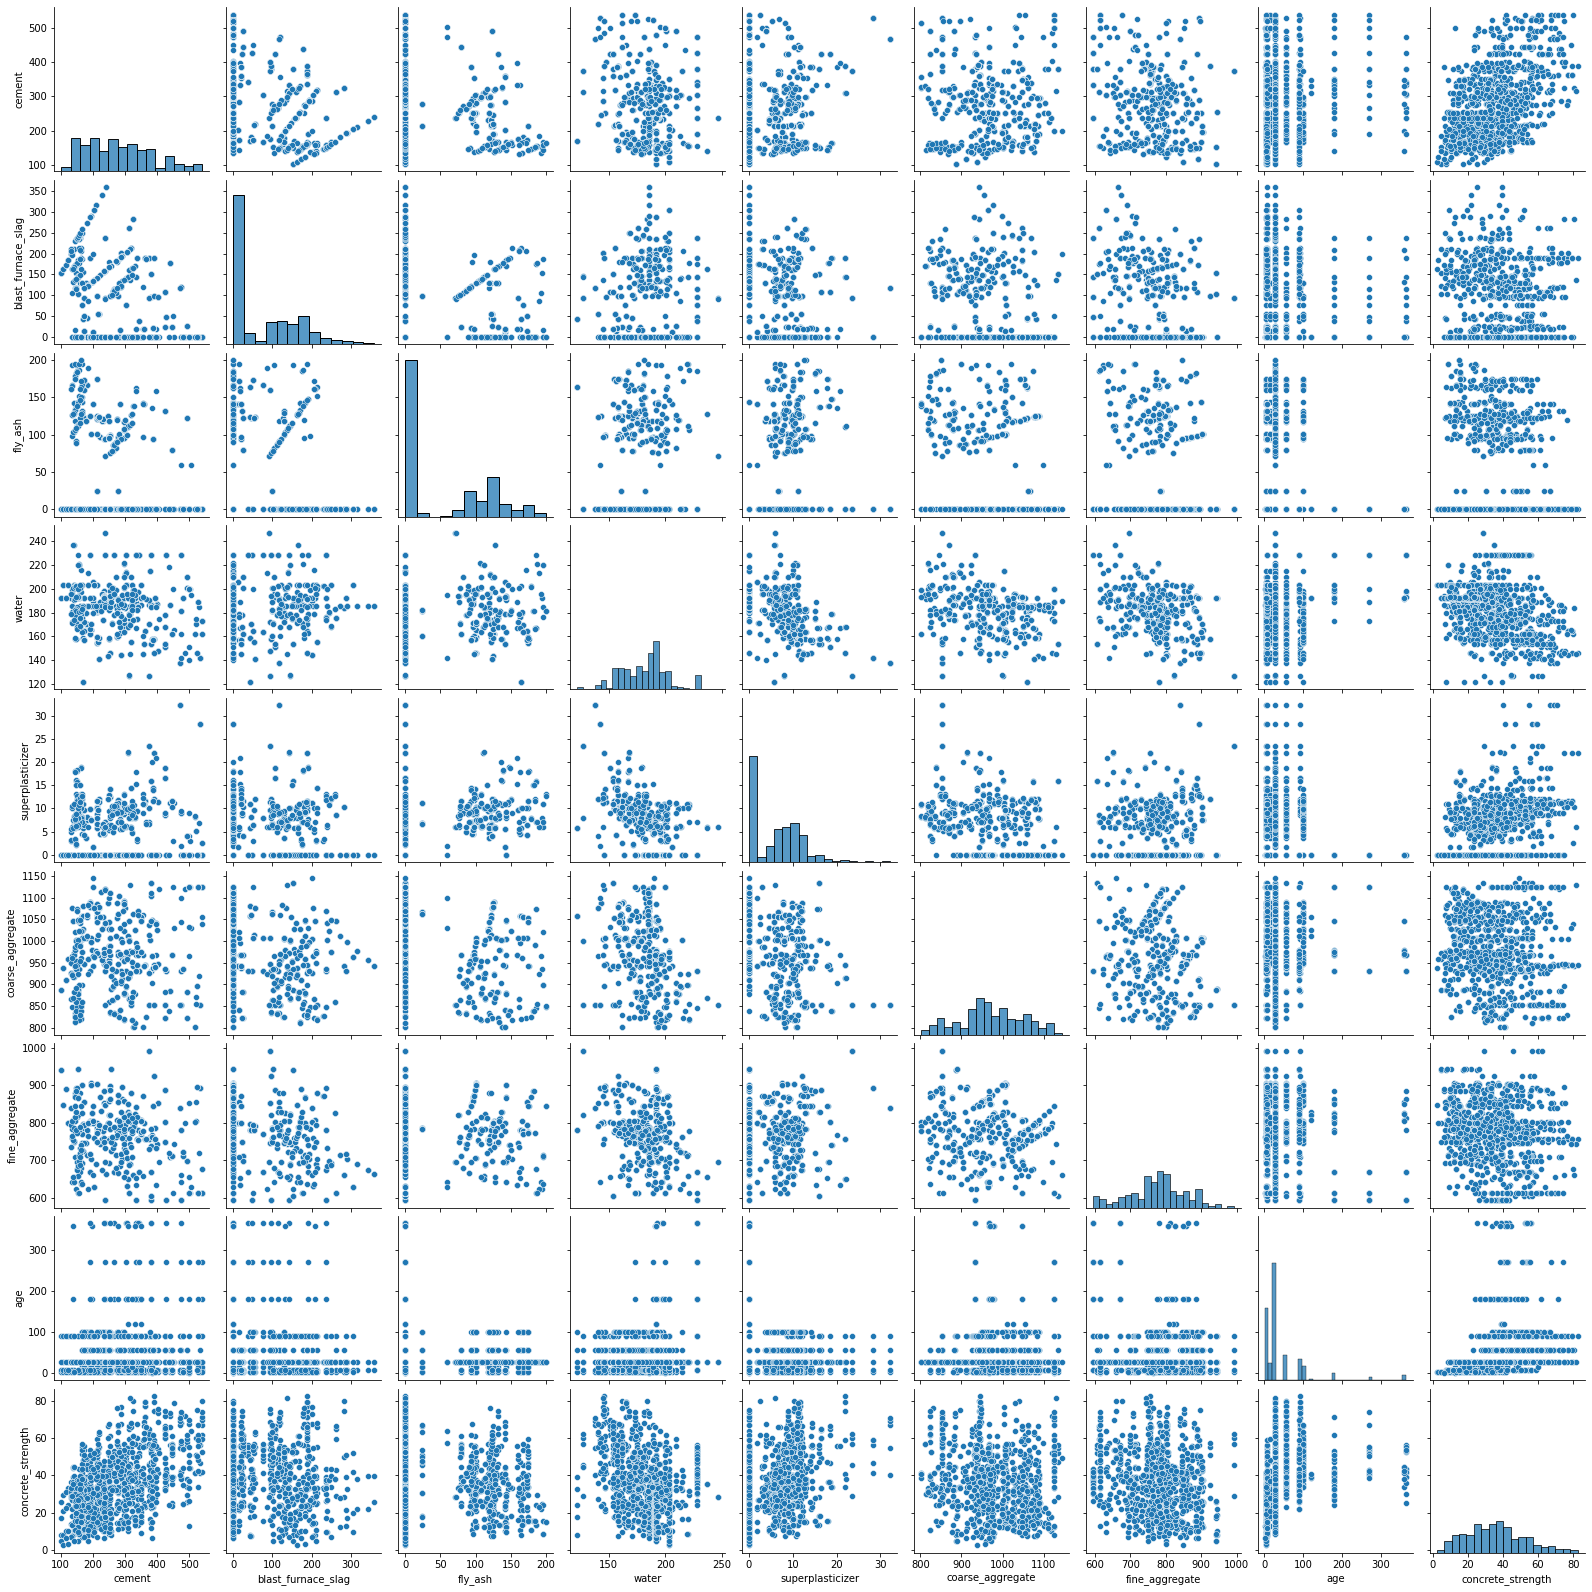

In [188]:
sns.pairplot(df)
plt.show()

There seems to be no high correlation between independant variables (features). This can be further confirmed by plotting the **Pearson Correlation coefficients** between the features.

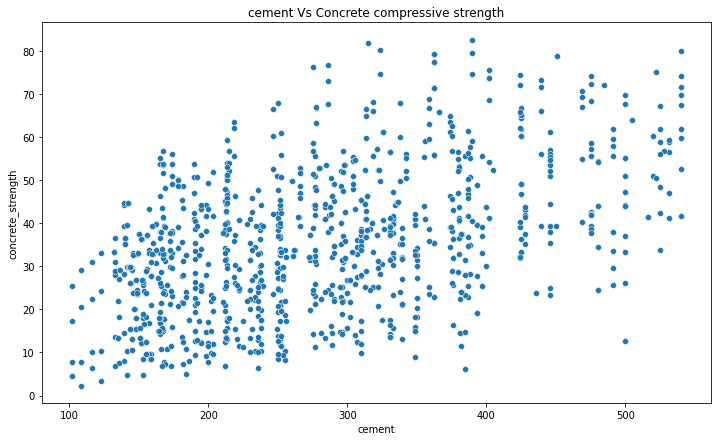

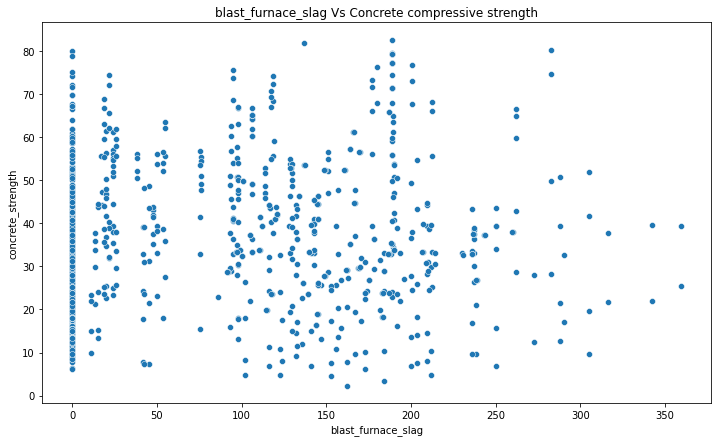

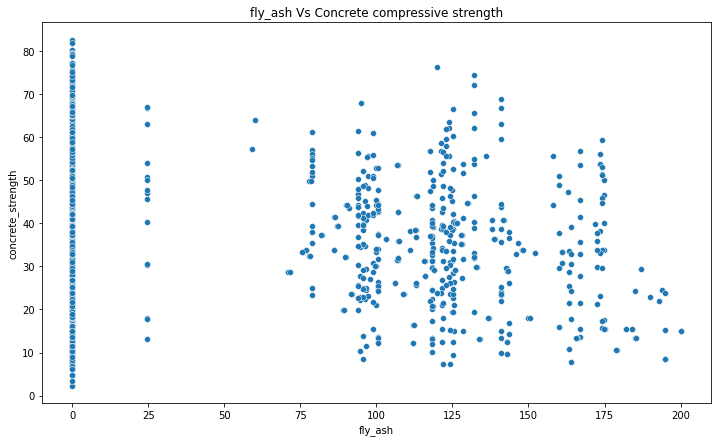

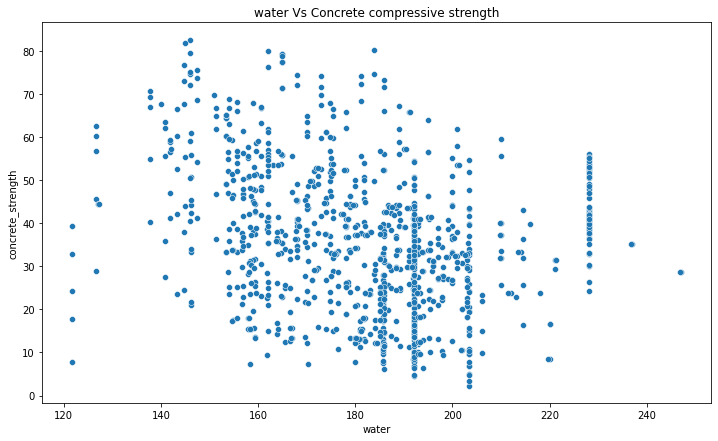

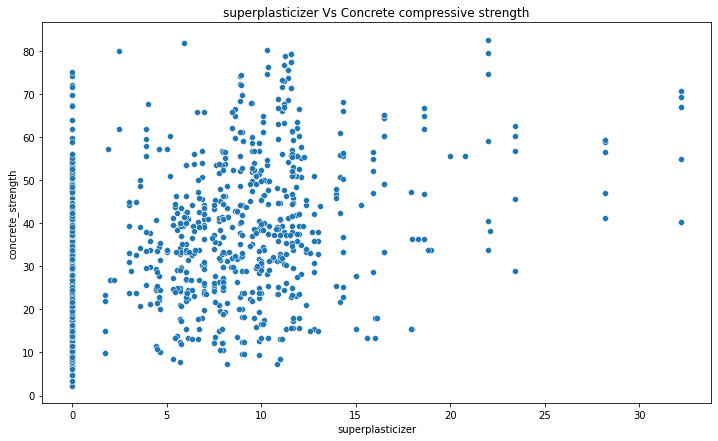

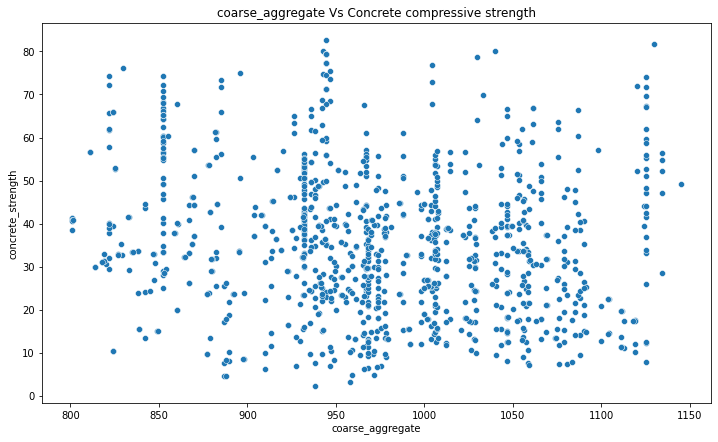

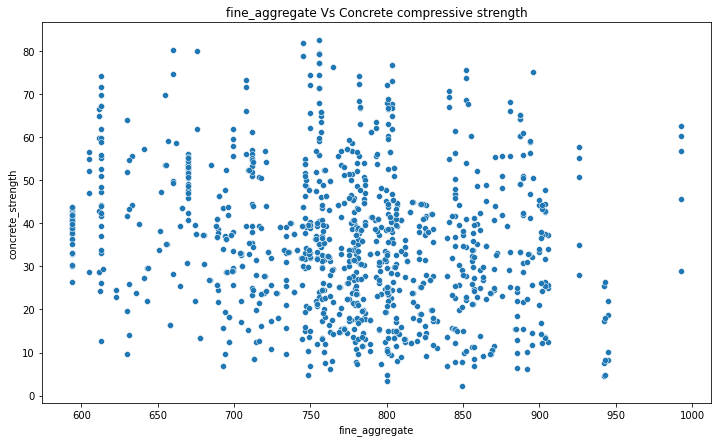

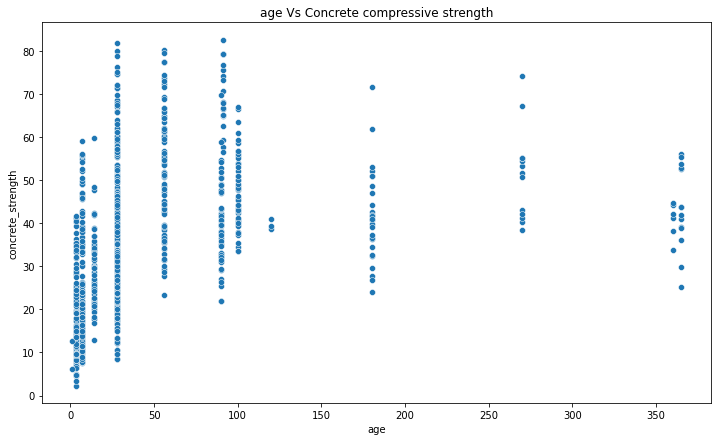

In [158]:
#Independent features Vs dependent feature - Visualization 
for i in df.columns:
    if i != 'concrete_strength':
        plt.figure(figsize=(12,7))
        plt.title(i+' '+'Vs Concrete compressive strength')
        sns.scatterplot(x = df[i],y=df.concrete_strength)

`Inferences:`<br>
1. Direct proportionality exists between Cement and the concrete compressive strength.
2. Inverse proportionality exists between water and the concrete compressive strength.
<br>
Let's check correlation matrices to check the correlations among all the variables.

### Exploratory data analysis

In [159]:
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
        'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'concrete_strength'}
df.rename(columns=columns,inplace=True)

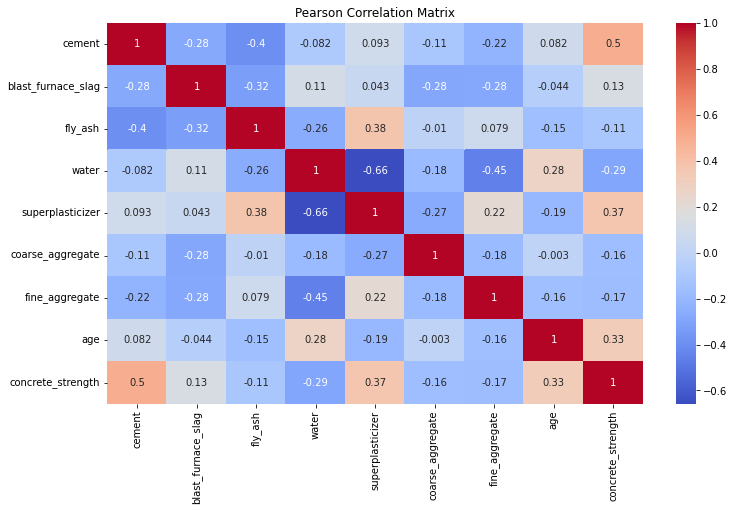

In [189]:
#Pearson Correlation matrix
plt.figure(figsize=(12,7))
plt.title('Pearson Correlation Matrix')
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')

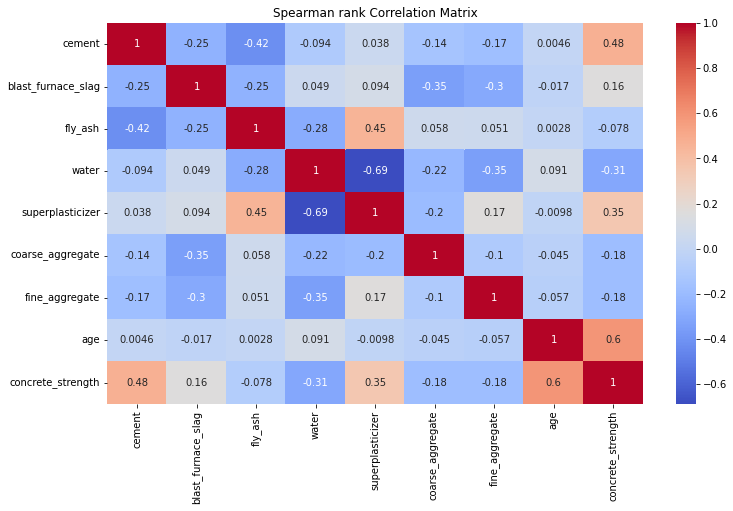

In [190]:
#Spearman rank correlation matrix to capture non linear relationships as well
plt.figure(figsize=(12,7))
plt.title('Spearman rank Correlation Matrix')
sns.heatmap(df.corr(method = 'spearman'),annot=True, cmap = 'coolwarm')

### Observations
`Inferences`:<br><br>
- Age, Cement, super plasticizer and Blast furnace slag are in positive correlation to the Concrete compressive strength.
- While water, coarse aggregae and fine aggregate are in negative correlation to the Concrete compressive strength.
- Fly ash is having nearly 0 correlation with the target variable.
- Super plasticizer is having negative correlation to the water.

In [161]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_strength'],
      dtype='object')

In [162]:
df.corr()['concrete_strength'].sort_values(ascending = False)

concrete_strength     1.000000
cement                0.497833
superplasticizer      0.366102
age                   0.328877
blast_furnace_slag    0.134824
fly_ash              -0.105753
coarse_aggregate     -0.164928
fine_aggregate       -0.167249
water                -0.289613
Name: concrete_strength, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

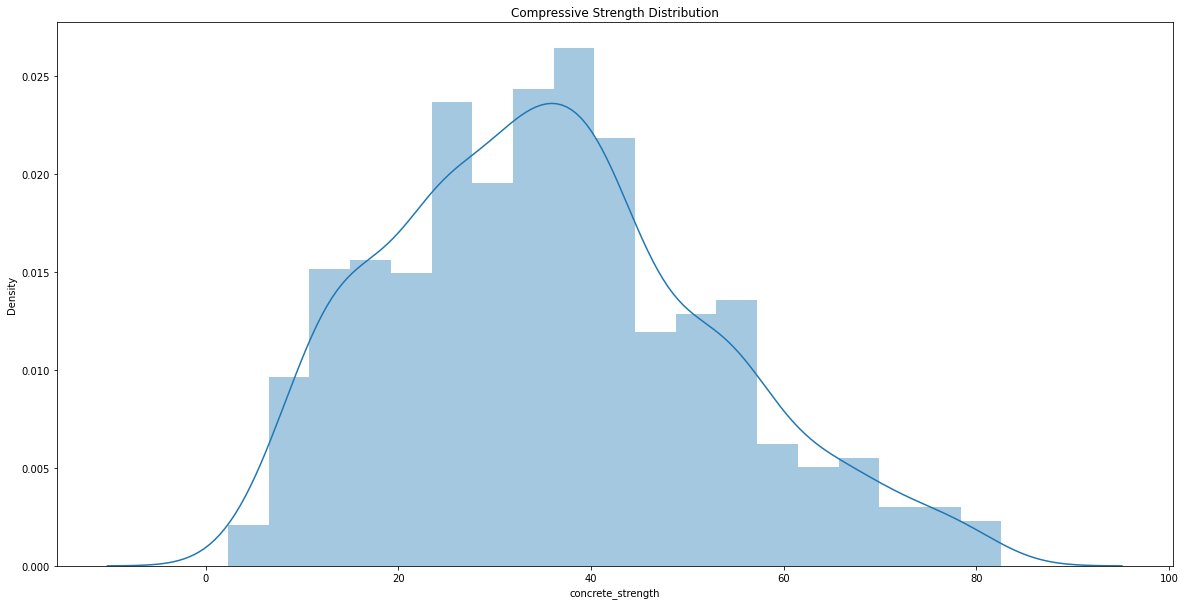

In [163]:
ax = sns.distplot(df.concrete_strength)
ax.set_title("Compressive Strength Distribution")

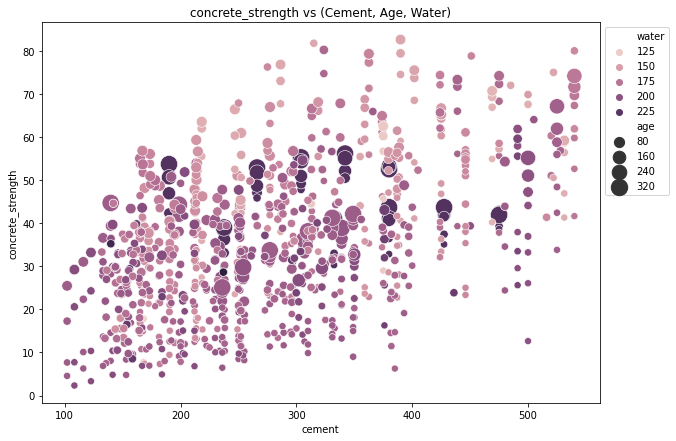

In [164]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="concrete_strength", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300))
ax.set_title("concrete_strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Observations from Strength vs (Cement, Age, Water)
* Compressive **strength increases with amount of cement**
* Compressive **strength increases with age**
* Cement with **low age** requires **more cement** for **higher strength**
* The **older the cement** is the **more water** it requires
* Concrete **strength increases** when **less water** is used in preparing it

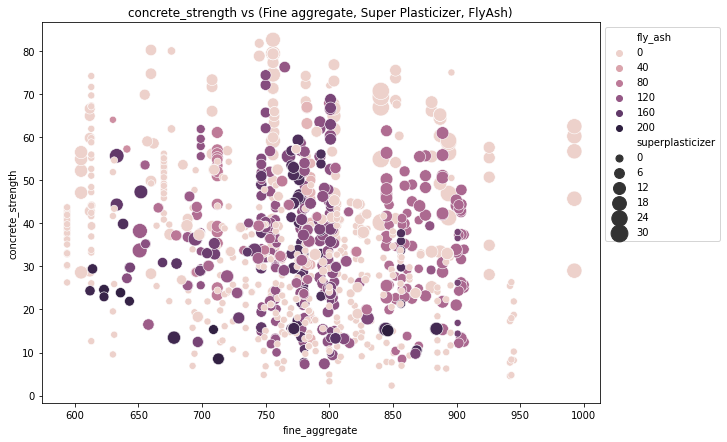

In [165]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="concrete_strength", x="fine_aggregate", hue="fly_ash", size="superplasticizer", 
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("concrete_strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

##### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)
* As **Flyash increases** the **strength decreases**
* **Strength increases** with **Super plasticizer**

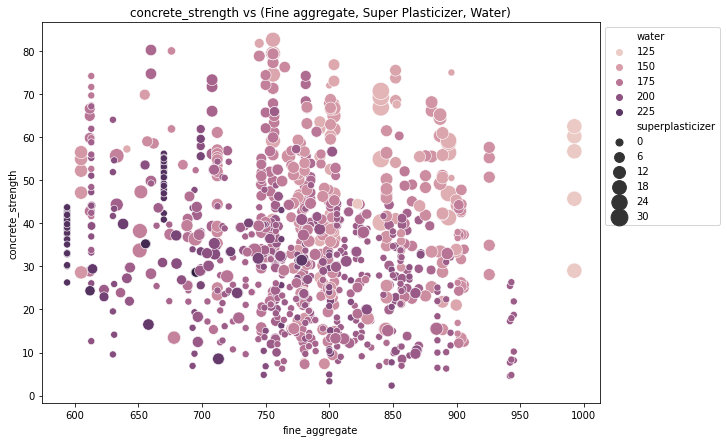

In [166]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="concrete_strength", x="fine_aggregate", hue="water", size="superplasticizer", 
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("concrete_strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

##### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, Water)
* **Strength decreases** with **increase in water**, **strength increases** with **increase in Super plasticizer** (already from above plots)
* **More Fine aggregate** is used when **less water**, **more Super plasticizer** is used.

#### Although we are making conclusions by observing the scatter plots, there is an underlying non linear interaction between features which we cannot visualize.
We can visually understand 2D, 3D and max upto 4D plots (by 4D I mean color and size represented by features) as shown above, we can further use row wise and column wise plotting features by seaborn to do further analysis, but still we lack the ability to track all these correlations by ourselves. For this reason, we can turn to Machine Learning to capture these relations and give better insights into the problem.

Fom here we will start processing the data and feed it to machine learning models to correctly predict the Compressive Strength of Concrete given the input features.

In [167]:
df['concrete_strength'].describe()

count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: concrete_strength, dtype: float64

### Data Preprocessing

Separating Input Features and Target Variable. 
##### Scaling 
Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.


*   The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.



In [217]:
X = df.iloc[:,:-1]         # Features - All columns but last
y = df.iloc[:,-1]          # Target - Last Column

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [219]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Building

Training Machine Learning Algorithms on the training data and making predictions on Test data.

## 1. Linear regression
- The Go-to method for Regression problems. 
- The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function. 
- The objective function used in this case is Mean Squared Error. 
- There are three versions of Linear Regression
    - Linear Regression - No regularisation
    - Lasso Regression - L1 regularisation (Tries to push coefficients to zero)
    - Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)
   
We will compare these three algorithms

In [220]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

##### Evaluation

Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.


In [221]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.68 		 114.13 	8.66 		0.54
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57



##### Plotting the coefficients
The performance seem to be similar with all the three methods. 



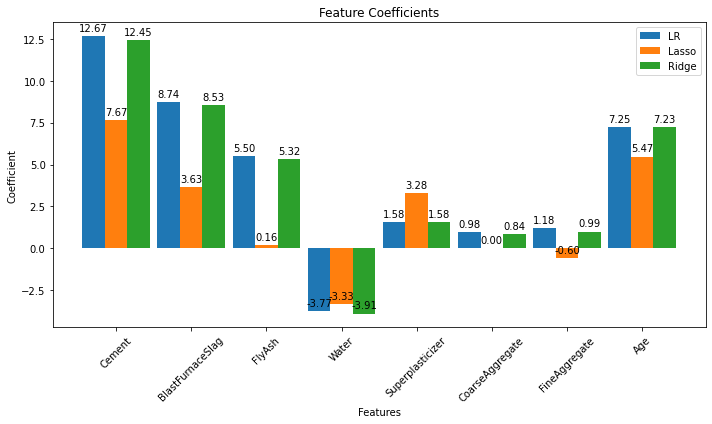

In [225]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

##### Plotting Predictions
Lasso Regression, reduces the complexity of the model by keeping the coefficients as low as possible. Also, Coefficients with Linear and Ridge are almost same.



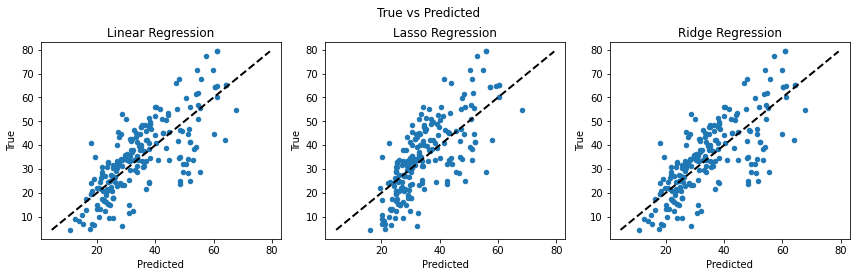

In [226]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## **Observations**
Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values. 

While Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is.)

### References

1. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
2. Yeh, I. C. (1998). Modeling of strength of high-performance concrete using artificial neural networks. Cement and Concrete research, 28(12), 1797-1808.
3. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html